# Understanding the Beer Game
## Using System Thinking to Improve Game Results
_The Beer Game illustrates how difficult it is to manage dynamic systems. It was originally developed in the late 1950s by Jay Forrester at MIT to introduce the concepts of dynamical systems. This notebook investigates the effect of different playing strategies._

>This is a Jupyter notebook version of the blog post [Understanding The Beer Game](https://www.transentis.com/understanding-the-beer-game/) originally published on the [transentis blog](https://www.transentis.com/resources/blog/). It uses a version of the Beer Game built using the System Dynamics Domain Specific Language (SD DSL) that is part of the BPTK-Framework.

In [1]:
from BPTK_Py.config import matplotlib_rc_settings

configuration = {"matplotlib_rc_settings" :matplotlib_rc_settings}

configuration["matplotlib_rc_settings"]["font.family"]="Marydale, DejaVu Sans"

from BPTK_Py.bptk import bptk 

bptk = bptk(configuration=configuration)

The Beer Game was originally developed at MIT in the 1950s to illustrate how difficult it is to manage dynamic systems – in this case the dynamic system is a supply chain that delivers beer from a brewery to the end consumer.

What makes the game so intriguing is that the structure of the supply chain and the rules of the game are simple, yet the resulting behavior is quite complex. The Beer Game is well documented: you can find my favorite description of the game in Peter Senge’s world wide bestseller “The Fifth Discipline”, John Sterman’s Business Dynamics analyses the game using system dynamics stock and flow models, a good online resource for the game is beergame.org.

To make it easier for you to access the game while reading this post, the game is included below:

In [2]:
from IPython.display import IFrame       
IFrame('https://beergame.transentis.com',width="700",height="500")

P.S: If you prefer to play the game in a separate screen try [beergame.transentis.com](http://beergame.transentis.com)

## The Challenge: Managing The Supply Chain

To understand the challenge of managing a supply chain, let’s take a more detailed look at its structure – the supply chain leads from the brewery, via a distributor and wholesaler to the reseller, who sells beer to his customers, the end consumers.

The objective of the game is to ensure that the consumers demand for beer can be met directly or at least with as small a delay as possible, while keeping each players inventory as small as possible.

The sketch below illustrates the supply chain and the flow of information along it:

![Overview of the supply chain](images/supply_chain.png)

Initially customer demand for beer is stable at 100 units per week and the entire supply chain is in a steady state. Each member of the supply chain has an inventory of 400 units.

The rules of the game are simple – in every round each player performs the following four steps:

* __Check deliveries.__ Check how many units of beer are being delivered to him from his supplier in the supply chain
* __Check incoming orders.__ Check how many units of beer his client in the supply chain has ordered.
* __Deliver beer.__ Deliver as much beer as he can to satisfy the customers demand (Note: in our implementation of the game above, this step is performed for you automatically).
* __Place outgoing order__. The difficult step is to decide how many units of beer the player needs from his supplier to keep his inventory stocked up and to ensure he has enough beer to meet future demands.

> Note: In the single player version of the game that I included above, you play the role of the retailer. The other roles are played by the computer, i.e. the order decision for these players is made by the computer according to a predefined order policy (the order policy the computer follows is essentially the one developed in this blog post).

## Some Pitfalls to be Aware of

There are three pitfalls in the beer game that players need to aware of:

* __Delays.__ Because of the nature of supply chains, the players demands for beer may not be fulfilled immediately – their supplier may also not have enough inventory and will then have to pass is own order up the supply chain. There is a delay of at least one week in each direction, i.e. a changed order will not be delivered for at least two weeks, even if there is enough stock in the suppliers inventory.
* __Inventory Costs.__ If you order to many units of beer, your inventory costs will rise, because you will need more people to handle the beer and more storage space. Each unit of beer has associated inventory cost of USD 0.5 per week. Because you cannot downsize your storage space to zero, the minimum inventory cost is always USD200, even if your inventory goes down to zero. Hence the target level of beer units in your inventory is 400 units, you should try to reach 250 units by the end of the game.
* __Backorder Costs__. If you order to few units of beer, you may not be able to meet your customer demand for beer. Backorders are also penalized, each unit of beer on backorder cost $1 per week. Hence the target is to keep the backorder at 0.

## How Game Performance is Appraised

At the end of the game each player gets a personal performance appraisal. Given the rules of the game and the pitfalls mentioned above, there are two relevant performance measures:

* __Individual Supply Chain Cost.__ This is the accumulated cost of the players part of the supply chain, i.e. the sum of his inventory and backorder cost over time. The individual supply chain cost target is to keep the accumulated cost below $8,300 throughout the game.

* __Total Supply Chain Cost.__ This is the total supply chain cost. It is important to keep an eye on this because the individual player could improve his own cost at the expense of the other players in the supply chain – we will see how this happens shortly. The total supply chain cost target is to keep the accumulated cost below $29,300 throughout the game.

## Supply Chain Dynamics – Dealing with Changing Demands for Beer

As I mentioned earlier on, the entire supply chain is in a steady state initially and the consumers demand for beer is stable at 100 units per week. Of course in the “real world” demand is never constant, which is one of the reasons why managing a supply chain is not easy in the first place.

What makes the beer game so interesting (and perhaps also frustrating) is that the consumers demand for beer doesn’t fluctuate wildly, on the contrary, it actually only changes once: the consumers demand for beer quadruples from 100 to 400 units in the second week and then remains at 400 for the rest of the game.

Nevertheless typical game results look something like those displayed in the graph below: even though the consumers orders never rise above 400, the retailers orders are close to 1000 for a long time. This leads to a huge “whiplash” effect along the supply chain, resulting in peak orders of well over 30,000 units in the brewery.

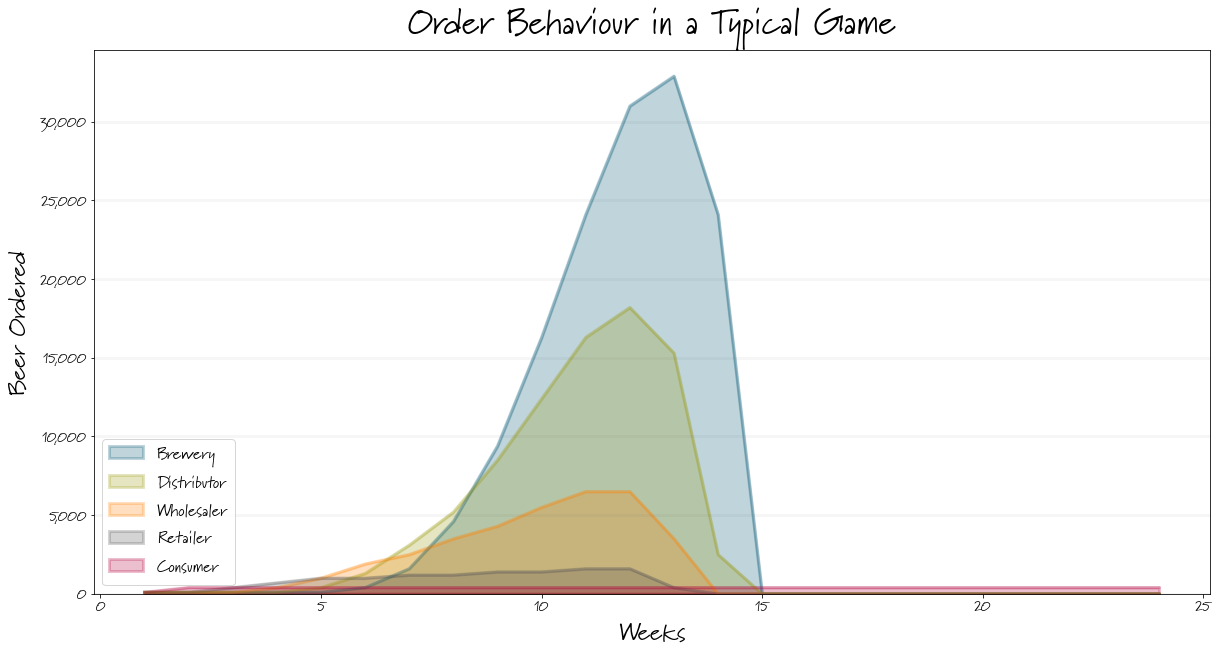

In [2]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["typical"],
    title="Order Behaviour in a Typical Game",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["brewery.sending_orders","distributor.sending_orders","wholesaler.sending_orders","retailer.sending_orders", "consumer.sending_orders"],
    series_names={
        "sd_dsl_beergame_typical_brewery.sending_orders" : "Brewery",
        "sd_dsl_beergame_typical_distributor.sending_orders" : "Distributor",
        "sd_dsl_beergame_typical_wholesaler.sending_orders": "Wholesaler",
        "sd_dsl_beergame_typical_retailer.sending_orders": "Retailer",
        "sd_dsl_beergame_typical_consumer.sending_orders": "Consumer"
    }
)

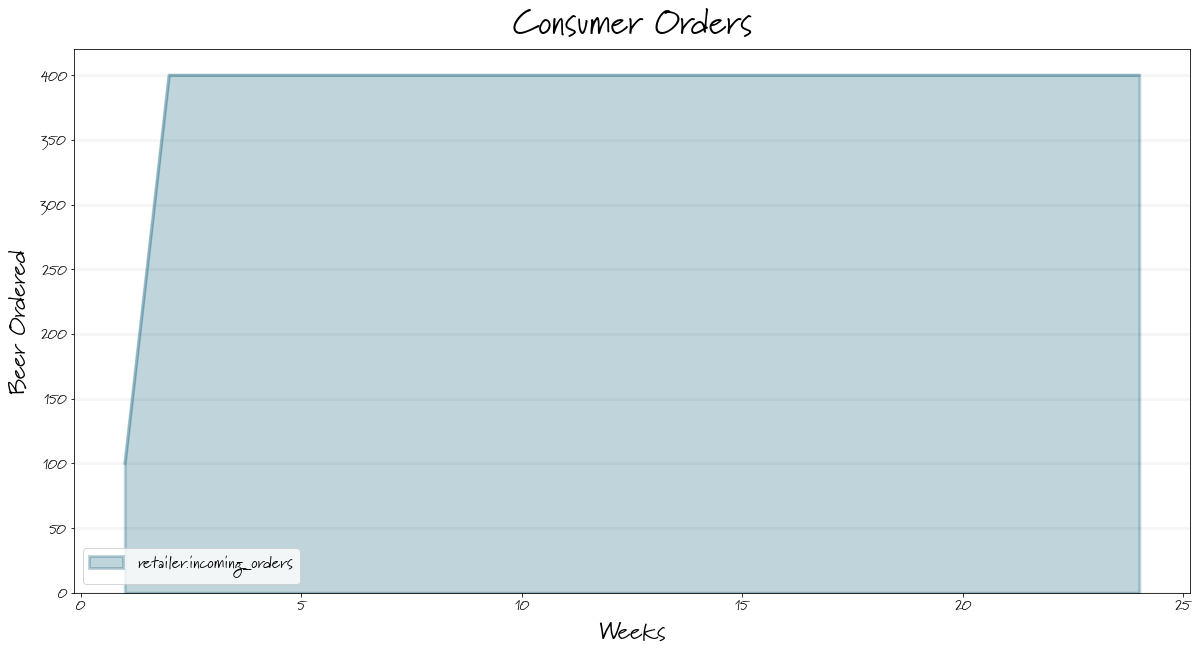

In [3]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["typical"],
    title="Consumer Orders",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["retailer.incoming_orders"],
    series_names={
         "sd_dsl_beergame_ignore_backorders_retailer.incoming_orders" : "Consumer",
    }
)

Given this order behavior it is not surprising that players build up huge inventories which take more than 2 years to deplete, given that the consumer orders are constant at 400 units per week.

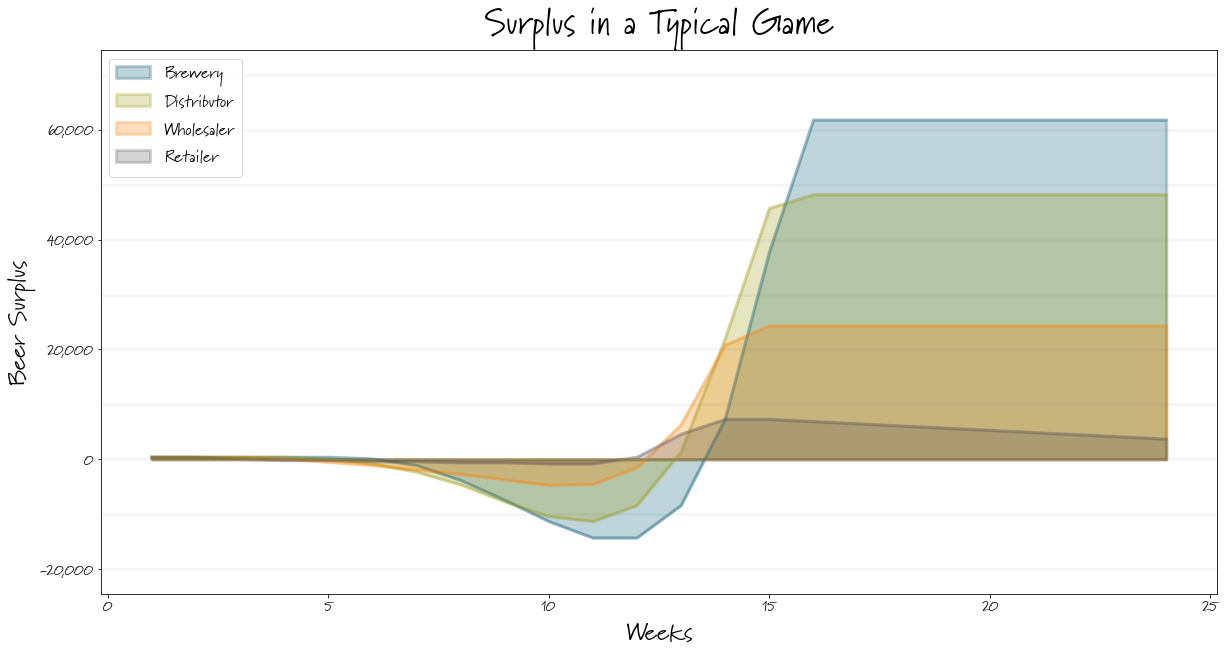

In [4]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["typical"],
    title="Surplus in a Typical Game",
    x_label="Weeks",
    y_label="Beer Surplus",
    equations=["brewery.surplus","distributor.surplus","wholesaler.surplus","retailer.surplus"],
    series_names={
        "brewery.surplus" : "Brewery",
        "distributor.surplus" : "Distributor",
        "wholesaler.surplus": "Wholesaler",
        "retailer.surplus": "Retailer"
    }
)

To understand why most players’ order behavior is like this initially, we need to understand the feedback loop that governs each players order decision.

## The Feedback Loop Governing the Players Order Decision

Each players objective is too satisfy incoming orders and to balance his inventory at a level close to the target inventory. So given the information available during the game, each players’s behavior should be balanced by the feedback loop displayed below:

* At the end of each round of the game the player establishes his current inventory by adding the incoming beer and subtracting the outgoing units of beer from the inventory.
* He then checks the customers current demand for beer, his target inventory and his current inventory and decides how many orders to place.
* The players supplier will (presumably) do something similar and will eventually deliver the beer that the player ordered.

![The Feedback Loop Governing The Beer Game](./images/feedback_loop_1.png)

The feedback loop is actually very simple, so what goes wrong?

Initially the problem is a psychological one: Yes, the feedback loop is simple, but an important part of that loop is invisible to the player and thus out of his control. I’ve illustrated this below.

![Each Player Only Controls Part Of The Loop](./images/feedback_loop_2.png)

So what really happens is this:

* The player places is order and waits for beer to arrive.
* And waits.
* No beer is delivered.
* The number of units on backorder begin to increase. So do the costs and hence the players anxiety level.
* Perhaps the order never arrived? Better to order more next time…

So even though the units that are on backorder have already been ordered, many players add the units that are on backorder to every new order just to be on the safe side, thus creating the positive feedback loop displayed below. Orders increase exponentially until eventually a huge amount of beer is delivered.

`Outgoing Orders = Incoming Orders + Target Inventory - Inventory + Backorder`

![What Actually Happens](images/feedback_loop_3.png)

Thus the first step to improving game results is to ignore backorders when making ordering decisions.

## Improving Game Results

### Ignoring Backorders

Given the balancing feedback loop above, what should the ordering policy look like?

The simplest approach is to check both your incoming orders and the level of your inventory every week and then to order enough to account for your desired inventory:

`Outgoing Orders = Incoming Orders + Target Inventory - Inventor`

You can test this strategy for yourself in the game above!

Though this leads to drastic improvement, the results are still not really satisfying, as you can see in the graph below that shows the order behavior and the resulting inventory.

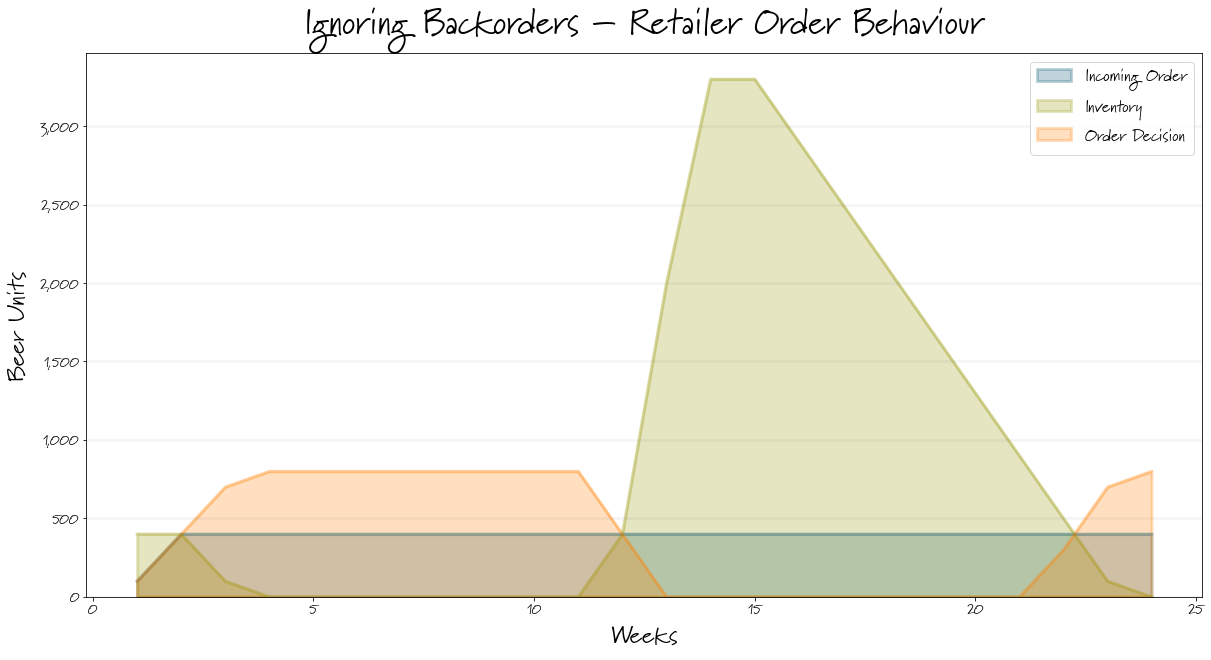

In [5]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["ignore_backorders"],
    title="Ignoring Backorders – Retailer Order Behaviour",
    x_label="Weeks",
    y_label="Beer Units",
    equations=["retailer.incoming_orders","retailer.inventory","retailer.order_decision"],
    series_names={
        "sd_dsl_beergame_ignore_backorders_retailer.incoming_orders" : "Incoming Order",
        "sd_dsl_beergame_ignore_backorders_retailer.inventory": "Inventory",
        "sd_dsl_beergame_ignore_backorders_retailer.order_decision": "Order Decision"
    }
    
)

The inventory still rises to a considerable amount – the reason is that the policy defined above still leads to over-ordering, because the policy “forgets” about the orders that have already been placed.

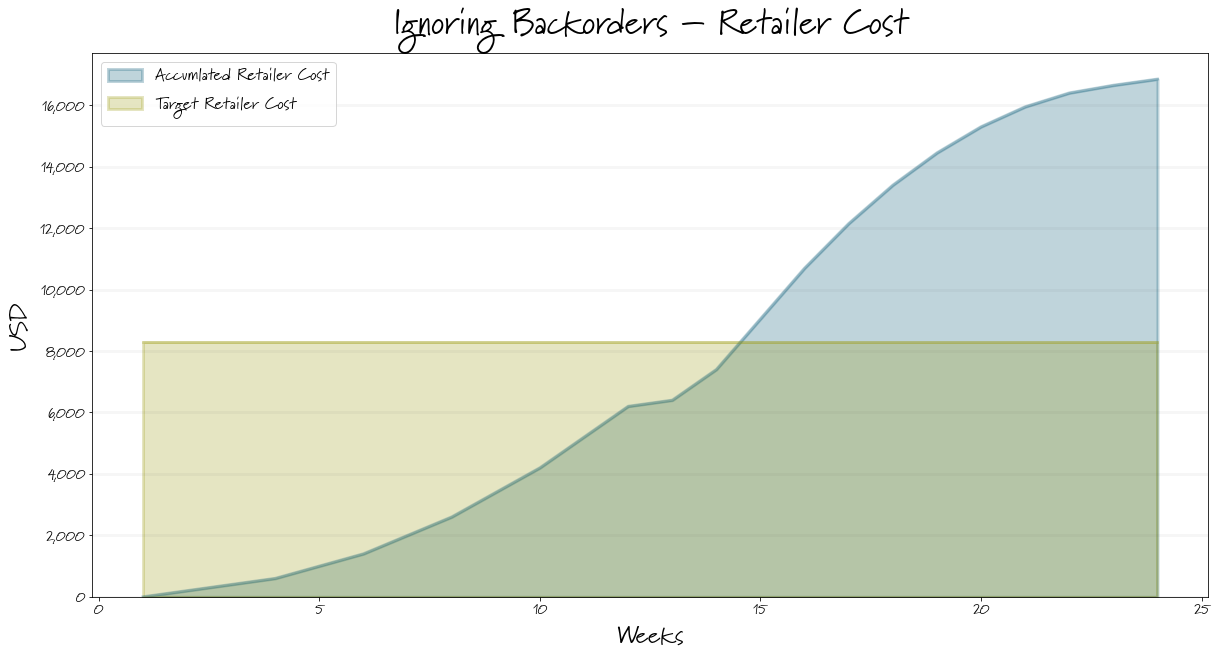

In [6]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["ignore_backorders"],
    title="Ignoring Backorders – Retailer Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performance_controlling.total_retailer_cost","policy_settings.target_retailer_cost"],
    series_names={
        "sd_dsl_beergame_ignore_backorders_performance_controlling.total_retailer_cost" : "Accumlated Retailer Cost",
        "sd_dsl_beergame_ignore_backorders_policy_settings.target_retailer_cost": "Target Retailer Cost"
    }
)

So let’ s see what happens when the ordering policy takes open orders in to account.

### Remembering Open Orders: Including the Supply Line

Our next step to improving our ordering policy is to remember how many items have already been ordered and to take this in to account in our order decision – to avoid confusion, I will refer to this quantity as the supply line.

![The Supply Line](images/supply_line.png)

If we include the supply line in our feedback loop, we arrive at the following diagram:

![Including The Supply Line](images/feedback_loop_4.png)

We now keep track of the outgoing orders in the supply line – every time an order goes out, the supply line also increases; as soon as new units of beer arrive, the supply line decreases. When we decide how many items to order, we also include the supply line in our order decision. This ensures that we never order an item more than once.

How many items should be in the supply line at any time?

To estimate this, let’s perform a little thought experiment and assume our inventory is zero and our customers order exactly 100 units every week and that we don’t worry about backorders. Then for the system to be in a stable state, we need to have 100 units delivered every week (which we then pass on directly to our customer, the consumer).

Because it takes two weeks for items that are ordered to be delivered, the customers who order in the first week don’t get any beer at all (sorry!), but we order 100 units. The customers in the second week also don’t get any beer either (sorry!), but again we order 100 units. Now there are 200 units in our supply line.

In the third week, our initial order finally arrives. We pass this delivery on the consumers and place another order of 100 units. From now on we can always satisfy the consumers demand. Our inventory is always zero, and we permanently have 200 units in our supply line.

What would change if the consumers didn’t always order 100 units but 200 units instead? Well in that case our supply line would be at 400 units (2 weeks time 200 units).

From this we can deduce that our open orders should always be equal to:

`Target Supply Line = Delivery Delay * Incoming Order`

>Note: Of course this is formula is only true if the delivery delay is stable and so are the items that are ordered – to improve our estimate for the target supply line we ought to replace the delivery delay by the average delivery delay and the items ordered by our expectation of how many items will be ordered. However, to keep our analysis simple I will not include this for now, but we should remember that for further exploration.

I’ve included an updated version of the causal loop diagram below.

![Target Policy For The Supply Line](images/feedback_loop_5.png)
Given our new causal loop diagram, we can also formulate a new ordering policy:

`Orders = Incoming Orders + Target Inventory - Inventory + Target Supply Line - Supply Lin`

Again you can test this strategy for yourself in the game above. It takes a little effort to track the supply line …

The results now look much better – the order peaks are smaller and less sustained. The target inventory is reached after 17 weeks.

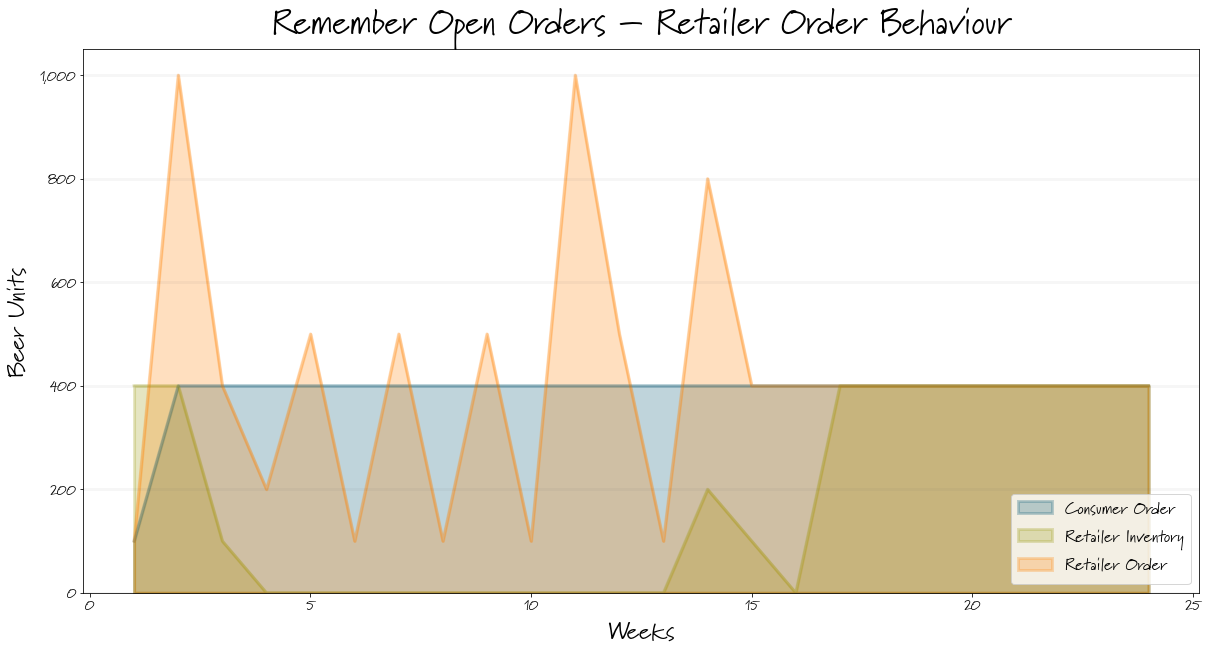

In [7]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["include_supply_line"],
    title="Remember Open Orders – Retailer Order Behaviour",
    x_label="Weeks",
    y_label="Beer Units",
    equations=["retailer.incoming_orders","retailer.inventory","retailer.order_decision"],
    series_names={
        "sd_dsl_beergame_include_supply_line_retailer.incoming_orders" : "Consumer Order",
        "sd_dsl_beergame_include_supply_line_retailer.inventory": "Retailer Inventory",
        "sd_dsl_beergame_include_supply_line_retailer.order_decision": "Retailer Order",
        
    }
)

The cost structure now also looks much better, we just manage to stay within the cost target:

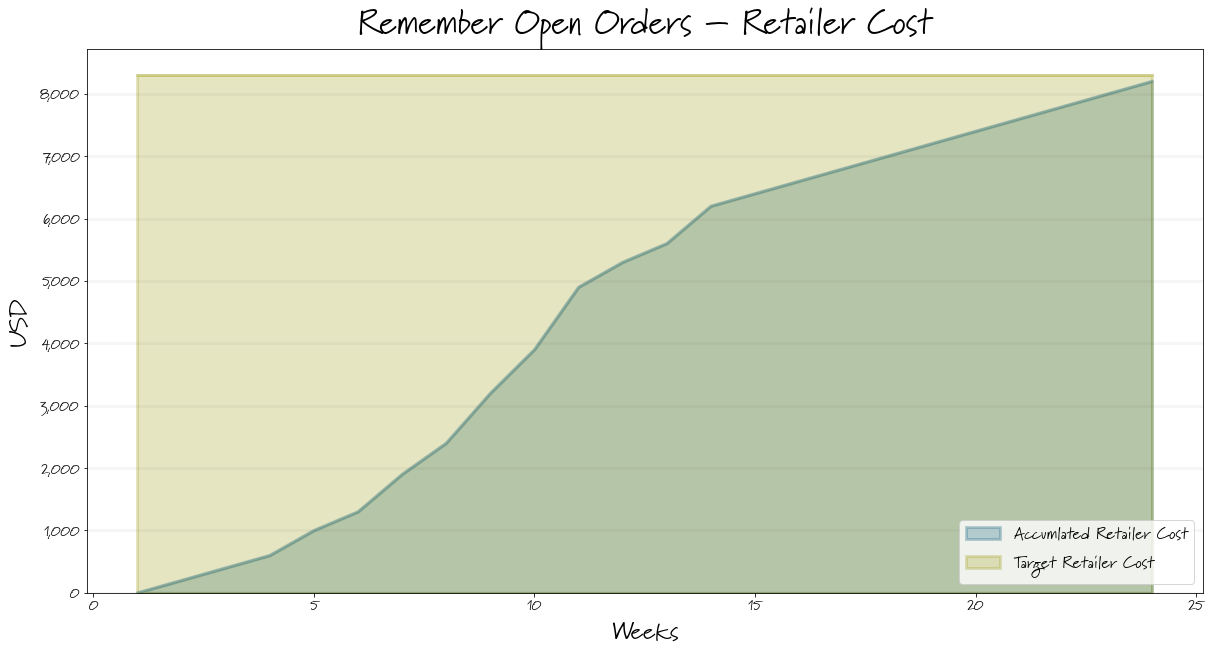

In [8]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["include_supply_line"],
    title="Remember Open Orders – Retailer Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performance_controlling.total_retailer_cost","policy_settings.target_retailer_cost"],
    series_names={
        "sd_dsl_beergame_include_supply_line_performance_controlling.total_retailer_cost" : "Accumlated Retailer Cost",
        "sd_dsl_beergame_include_supply_line_policy_settings.target_retailer_cost": "Target Retailer Cost"
    }
)

Our surplus is also looking good, we easily reach the surplus target:

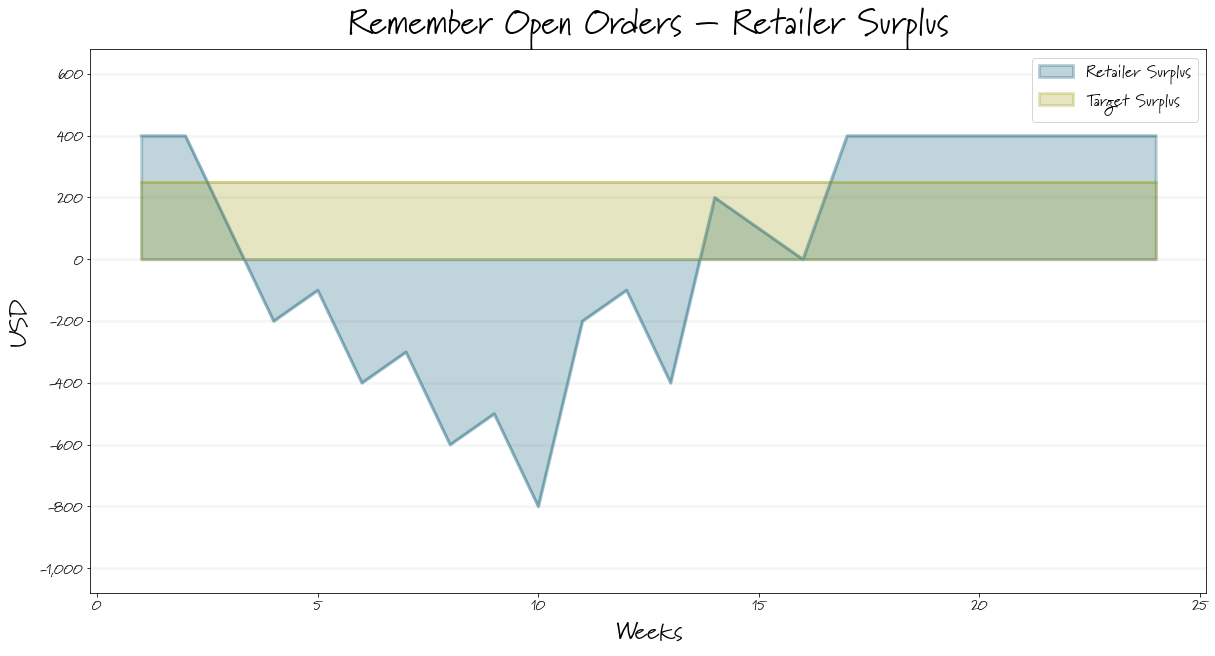

In [9]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["include_supply_line"],
    title="Remember Open Orders – Retailer Surplus",
    x_label="Weeks",
    y_label="USD",
    equations=["retailer.surplus","policy_settings.target_surplus"],
    series_names={
        "sd_dsl_beergame_include_supply_line_retailer.surplus" : "Retailer Surplus",
        "sd_dsl_beergame_include_supply_line_policy_settings.target_surplus": "Target Surplus"
    }
)

### Avoiding the Whiplash Effect

Unfortunately, our new ordering policy still leads to a huge whiplash effect – this is because each of the players in the supply chain uses the same ordering policy and tries to ensure that the target inventory level is reached and the order pipeline is filled. Because the consumer places a larger order, the retailer has to place an even larger order. And the wholesaler then places an even larger order … you can see this effect nicely in the graph below.

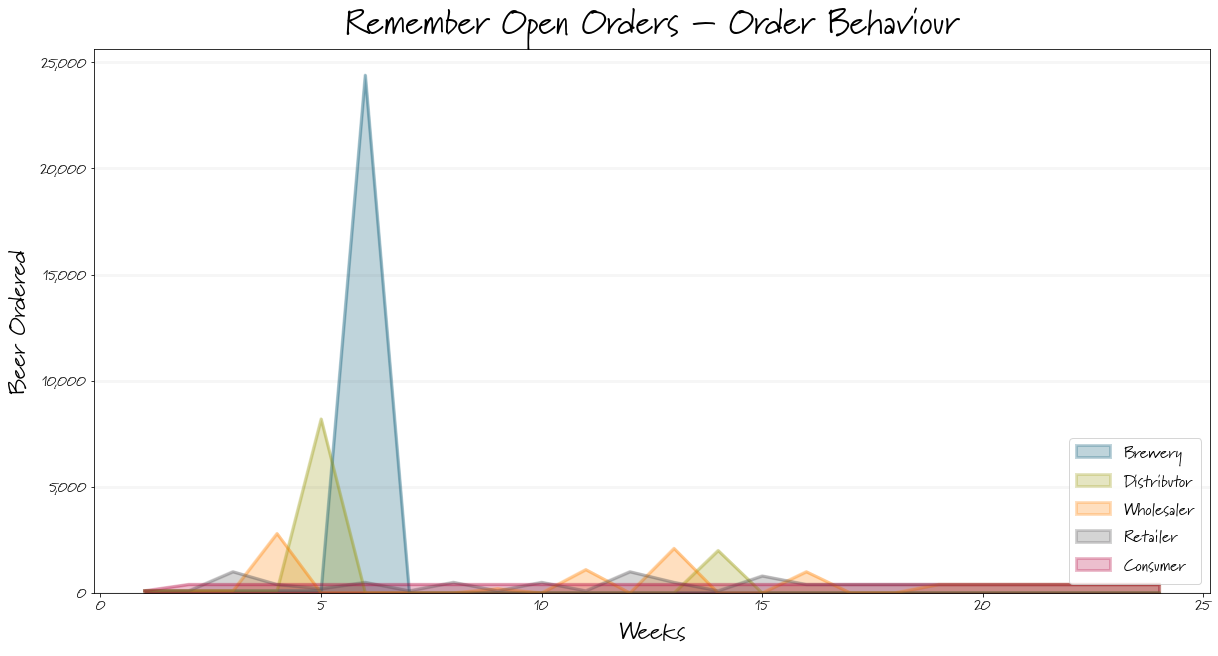

In [10]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["include_supply_line"],
    title="Remember Open Orders – Order Behaviour",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["brewery.sending_orders","distributor.sending_orders","wholesaler.sending_orders","retailer.sending_orders", "consumer.sending_orders"],
    series_names={
        "sd_dsl_beergame_include_supply_line_brewery.sending_orders" : "Brewery",
        "sd_dsl_beergame_include_supply_line_distributor.sending_orders" : "Distributor",
        "sd_dsl_beergame_include_supply_line_wholesaler.sending_orders": "Wholesaler",
        "sd_dsl_beergame_include_supply_line_retailer.sending_orders": "Retailer",
        "sd_dsl_beergame_include_supply_line_consumer.sending_orders": "Consumer"
    }
)

Because of these order peaks, the total supply chain costs also explode and are still way beyond the cost target.

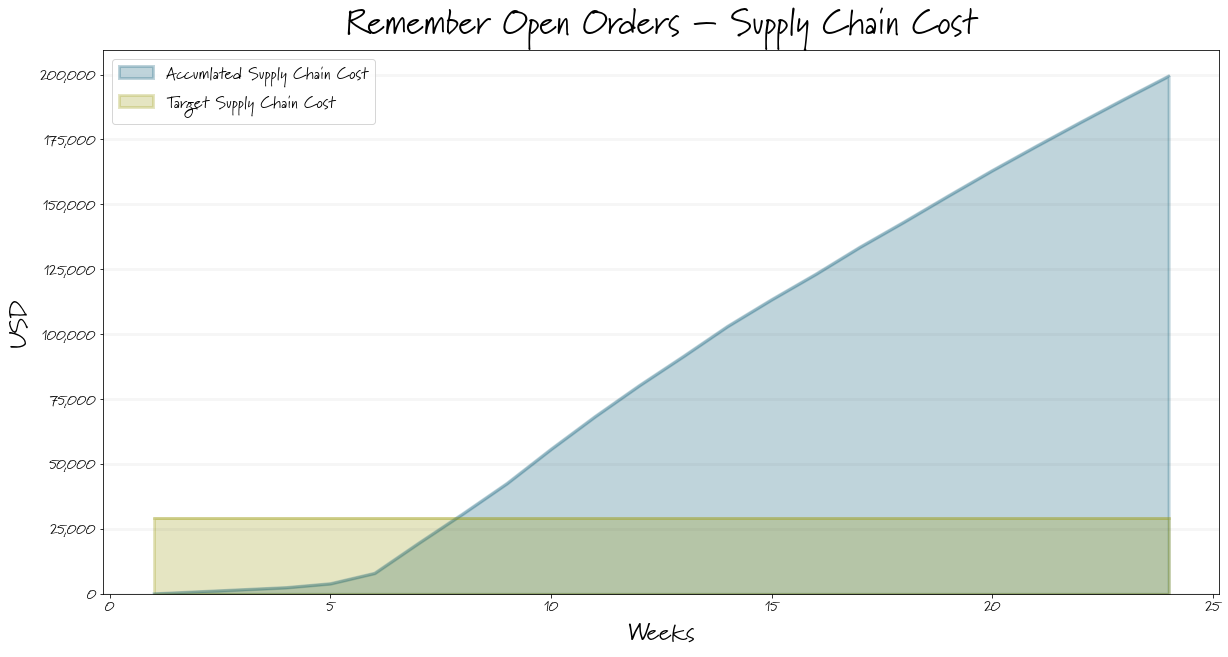

In [11]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["include_supply_line"],
    title="Remember Open Orders – Supply Chain Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performance_controlling.total_supply_chain_cost","policy_settings.target_supply_chain_cost"],
    series_names={
        "sd_dsl_beergame_include_supply_line_performance_controlling.total_supply_chain_cost" : "Accumlated Supply Chain Cost",
        "sd_dsl_beergame_include_supply_line_policy_settings.target_supply_chain_cost": "Target Supply Chain Cost"
    }
    
)

How can the whiplash effect be avoided?

The key to avoiding the whiplash effect is to avoid placing orders that are significantly different from last weeks orders – so instead of trying to adjust the actual inventory to the desired inventory as quickly as possible, we do this gently over a longer period of time, as in the following order policy:

`Orders = Incoming Orders + (Target Inventory - Inventory + Target Supply Line - Supply Line)/Inventory Adjustment Time`


I’ve updated the causal loop diagram to include the inventory adjustment time which defines how much time we allow to adjust the inventory to the desired level:

![Including Inventory Adjustment Time](images/feedback_loop_6.png)

The graph below shows what happens when we set the inventory adjustment time to 8 weeks.

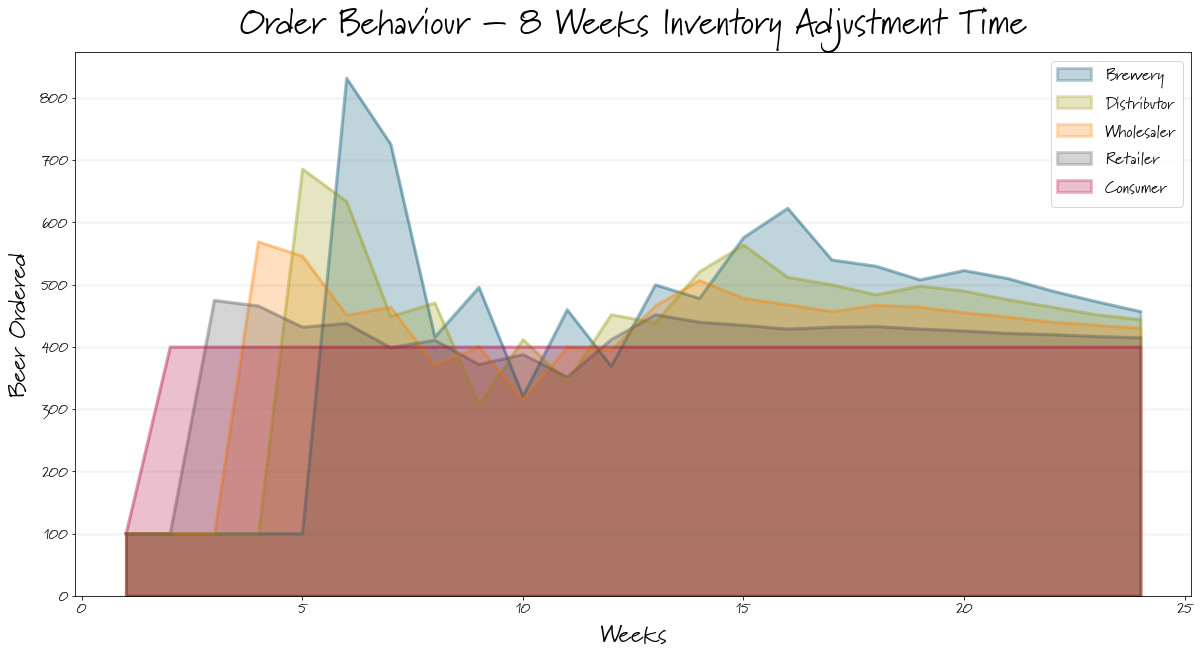

In [12]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["inventory_adjustment_time_8"],
    title="Order Behaviour – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="Beer Ordered",
    equations=["brewery.sending_orders","distributor.sending_orders","wholesaler.sending_orders","retailer.sending_orders", "consumer.sending_orders"],
    series_names={
        "sd_dsl_beergame_inventory_adjustment_time_8_brewery.sending_orders" : "Brewery",
        "sd_dsl_beergame_inventory_adjustment_time_8_distributor.sending_orders" : "Distributor",
        "sd_dsl_beergame_inventory_adjustment_time_8_wholesaler.sending_orders": "Wholesaler",
        "sd_dsl_beergame_inventory_adjustment_time_8_retailer.sending_orders": "Retailer",
        "sd_dsl_beergame_inventory_adjustment_time_8_consumer.sending_orders": "Consumer"
    }
)

With these settings, we reach all our performance targets.

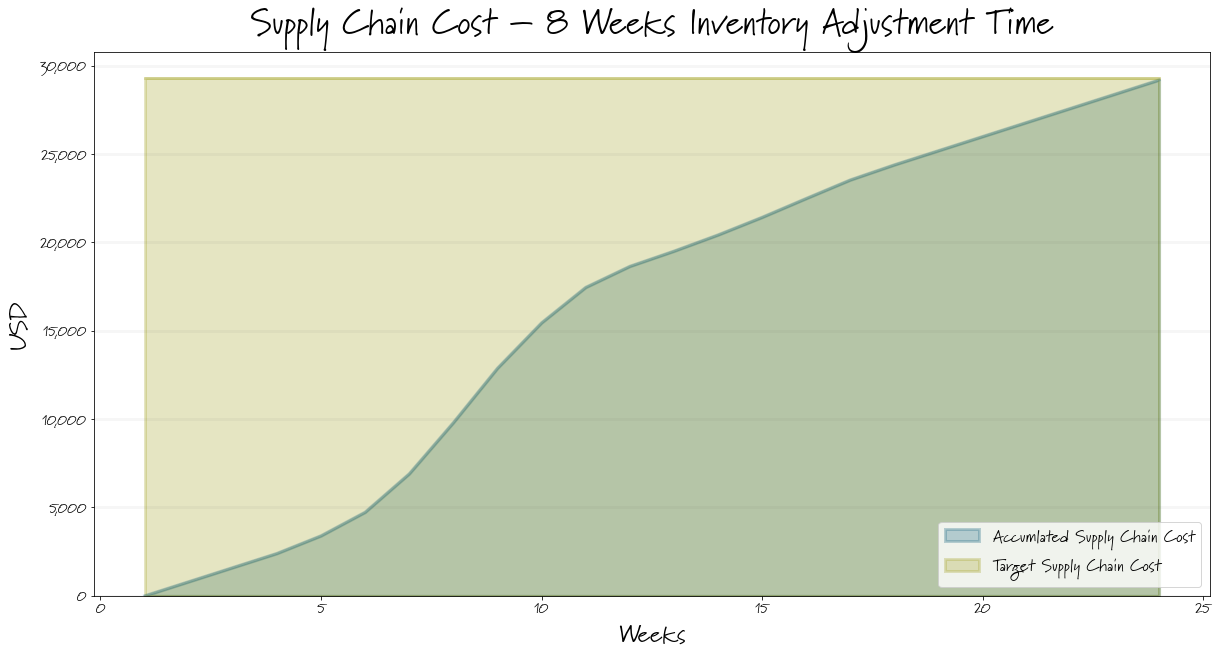

In [13]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["inventory_adjustment_time_8"],
    title="Supply Chain Cost – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="USD",
    equations=["performance_controlling.total_supply_chain_cost","policy_settings.target_supply_chain_cost"],
    series_names={
        "sd_dsl_beergame_inventory_adjustment_time_8_performance_controlling.total_supply_chain_cost" : "Accumlated Supply Chain Cost",
        "sd_dsl_beergame_inventory_adjustment_time_8_policy_settings.target_supply_chain_cost": "Target Supply Chain Cost"
    }
)

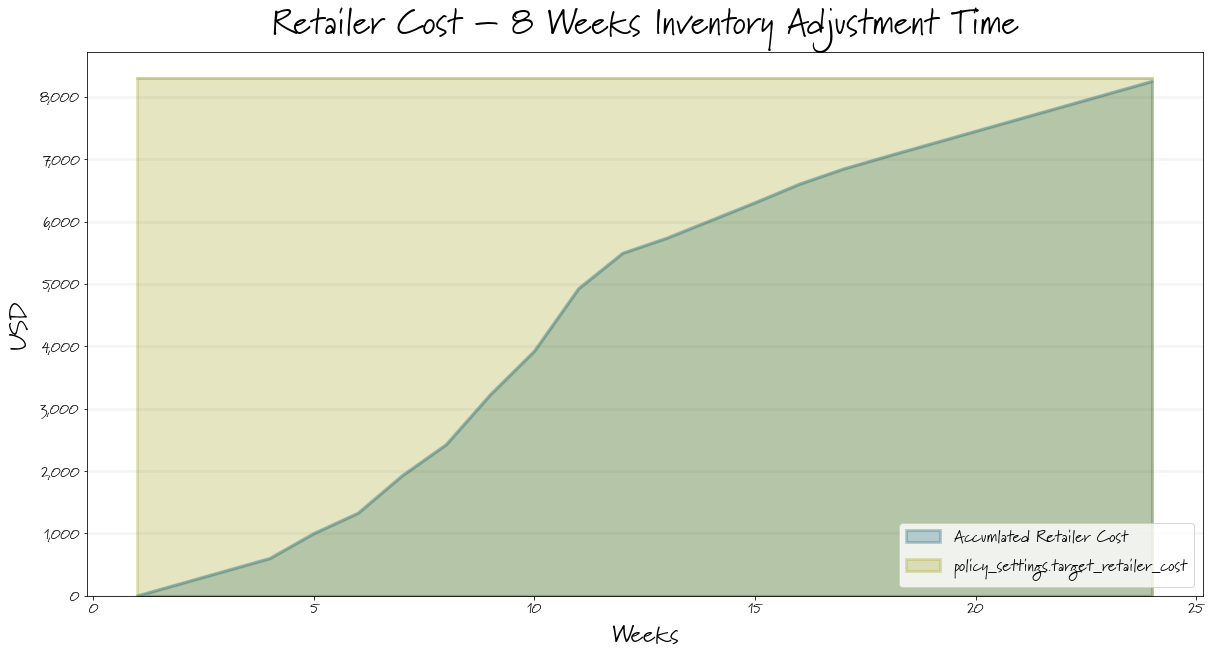

In [14]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["inventory_adjustment_time_8"],
    title="Retailer Cost – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="USD",
    equations=["performance_controlling.total_retailer_cost","policy_settings.target_retailer_cost"],
    series_names={
        "sd_dsl_beergame_inventory_adjustment_time_8_performance_controlling.total_retailer_cost" : "Accumlated Retailer Cost",
        "sd_dsl_beergame_inventory_adjustment_time_8_line_policy_settings.target_retailer_cost": "Target Retailer Cost"
    }
)

The surplus also reaches the desired level – given even more time, the inventory would adjust to the desired level of 400.

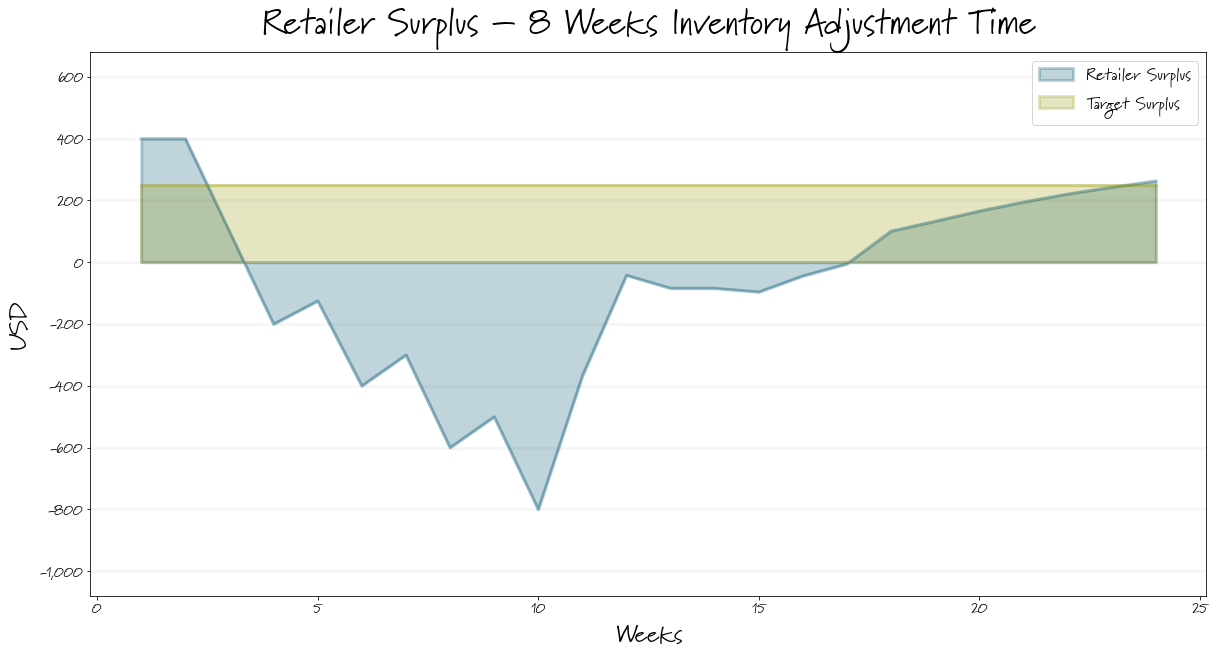

In [17]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
     scenarios=["inventory_adjustment_time_8"],
    title="Retailer Surplus – 8 Weeks Inventory Adjustment Time",
    x_label="Weeks",
    y_label="USD",
    equations=["retailer.surplus","policy_settings.target_surplus"],
    series_names={
        "sd_dsl_beergame_inventory_adjustment_time_8_retailer.surplus" : "Retailer Surplus",
        "sd_dsl_beergame_inventory_adjustment_time_8_policy_settings.target_surplus": "Target Surplus"
    }
)

Of course there is a trade off here – because we adjust the inventory slowly, we are out of stock more often and hence our service level towards our customers in the supply chain goes down. But in the Beer Game this is outweighed by the performance target we have for keeping the total supply chain cost low.

To illustrate this trade-off we can take a look at how the retailer surplus and the total supply chain costs vary with the inventory adjustment time.

The graph below plots the retailer surplus for different inventory adjustment times. The shorter the inventory adjustment time is, the quicker the surplus gets back above zero and the quicker we reach the desired inventory of 400.

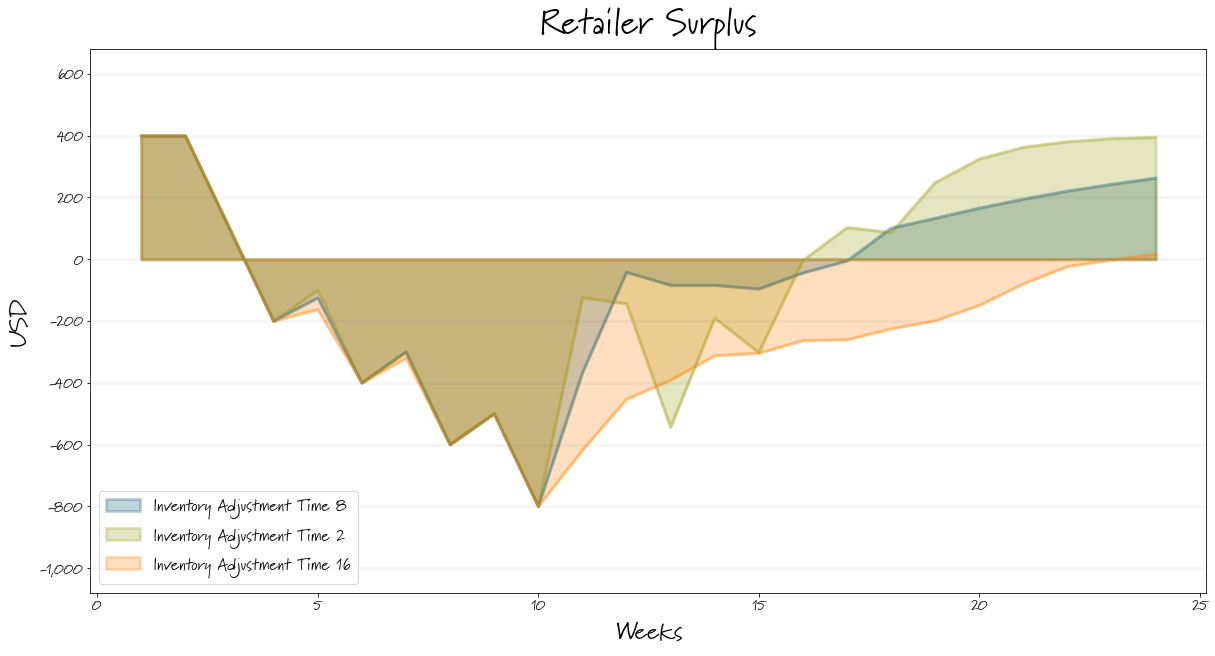

In [15]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
     scenarios=["inventory_adjustment_time_2","inventory_adjustment_time_8","inventory_adjustment_time_16"],
    title="Retailer Surplus",
    x_label="Weeks",
    y_label="USD",
    equations=["retailer.surplus"],
    series_names={
          "sd_dsl_beergame_inventory_adjustment_time_2_retailer.surplus" : "Inventory Adjustment Time 2",
        "sd_dsl_beergame_inventory_adjustment_time_8_retailer.surplus" : "Inventory Adjustment Time 8",
        "sd_dsl_beergame_inventory_adjustment_time_16_retailer.surplus": "Inventory Adjustment Time 16"
    }
)

On the other hand, the graph below shows how the total supply chain costs varies with the stock adjustment time – the interesting effect here is that a stock adjustment time of 16 weeks has a lower overall cost attached to it initially but in the long run the stock adjustment time of 8 weeks performs better. This is because the total cost includes penalties both for being out of stock and for being overstocked – if the adjustment time is to short, then some of the suppliers are overstocked and hence the cost increase. If the adjustment time is too long, then eventually all suppliers will be out of stock, which increases the total supply chain cost.

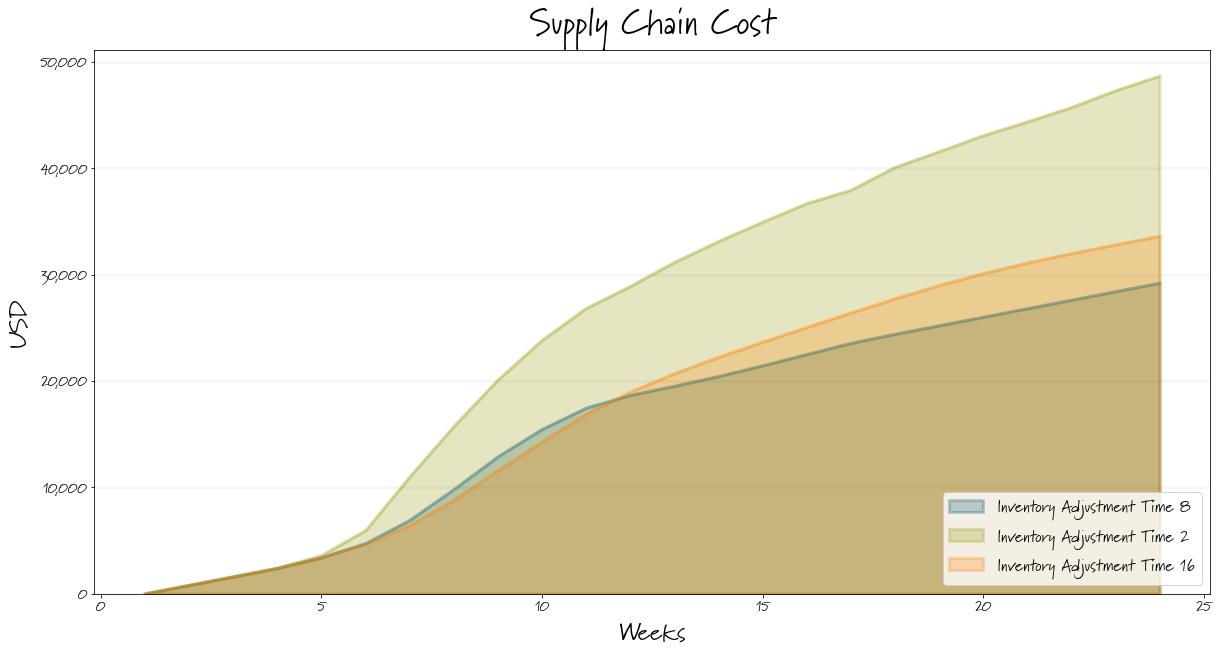

In [16]:
bptk.plot_scenarios(
    scenario_managers=["sd_dsl_beergame"],
    kind="area",
    scenarios=["inventory_adjustment_time_8","inventory_adjustment_time_2","inventory_adjustment_time_16"],
    title="Supply Chain Cost",
    x_label="Weeks",
    y_label="USD",
    equations=["performance_controlling.total_supply_chain_cost"],
    series_names={
        "sd_dsl_beergame_inventory_adjustment_time_2_performance_controlling.total_supply_chain_cost" : "Inventory Adjustment Time 2",
        "sd_dsl_beergame_inventory_adjustment_time_8_performance_controlling.total_supply_chain_cost" : "Inventory Adjustment Time 8",
        "sd_dsl_beergame_inventory_adjustment_time_16_performance_controlling.total_supply_chain_cost": "Inventory Adjustment Time 16"
    }
)

The ordering policy above is the policy that we have implemented for the single player version of the game presented above.

## Where To Go From Here: Redesigning the Entire Supply Chain

This post explains the dynamics behind the Beer Game. It illustrates how to analyze and improve the ordering policies of individual players in the supply chain using causal loop diagrams and some live experiments with the game.

Of course in reality it would be risky and expensive to perform such live experiments with your supply chain– that is why it is useful to build simulations which give you the opportunity to perform risk-free experiments.

I’ve included such a simulation model below, to give you the opportunity to experiment with the changes to the ordering policy we have been discussing:

In [17]:
%run src/dashboard/beergame_dashboard_sd_dsl.ipy

Our analysis of the supply chain also points to further improvement potential – the way the supply chain in the Beer Game is structured, each player only communicates orders to his immediate supplier in the chain, therefore it takes quite a long time to react to changes in customer demand.

Surely we could improve the performance of the supply chain, if the consumers demand for beer were communicated to all players in the chain directly?

So instead of just taking a local view of each players behavior we could take a global view of the entire supply chain; instead of just improving each players ordering policy we should change the architecture of the entire supply chain.

Needless to say that this is what actually happened in the “real world”, we just need to look at just-in-time production and lean manufacturing (and let’s not forget that the beer game was developed in the 1950s, before these revolutions took place).

Though these ideas are very exciting, I feel we have achieved enough for now and will therefore leave a detailed investigation of these ideas to a future post.